In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load the data
data = pd.read_csv('data/interactive-data.csv')
# data.head()
data.shape

(7575, 38)

In [3]:
# pre-processing the columns
# change age_band
data["age_band"] = data["age_band"].map({"0-35":1, "35-55":2, "55<=":3})

# preprocess "edu" column
data["edu"] = data["edu"] .map({"Level or lower":0, "HE or higher":1})

# change imd_band 
data["imd_band"] = data["imd_band"].map({"01/10/2020":'', "0-10%":0, "10-20%":1, "20-30%":2, "30-40%":3, "40-50%":4, "50-60%":5, "60-70%":6, "70-80%":7, "80-90%":8, "90-100%":9})

data.dropna(inplace=True)
data.shape

(6189, 38)

In [4]:
# preprocessing using min max scaler
#  'imd_band', 'age_band', 'edu','adjusted_mark'

scaler= MinMaxScaler()

scaler.fit(data[['imd_band']])
data['imd_band'] = scaler.transform(data[['imd_band']])

scaler.fit(data[['age_band']])
data['age_band'] = scaler.transform(data[['age_band']])

scaler.fit(data[['edu']])
data['edu'] = scaler.transform(data[['edu']])

scaler.fit(data[['adjusted_mark']])
data['adjusted_mark'] = scaler.transform(data[['adjusted_mark']])

/var/folders/mm/wmbw6bv54s75hqq51vn_kjvm0000gn/T/ipykernel_2204/3160222806.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x='imd_band',y='adjusted_mark', data=data,cmap="copper", label='the Index of Multiple Deprivation')
/var/folders/mm/wmbw6bv54s75hqq51vn_kjvm0000gn/T/ipykernel_2204/3160222806.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x='age_band',y= 'adjusted_mark', data=data,cmap="copper", label='Age')
/var/folders/mm/wmbw6bv54s75hqq51vn_kjvm0000gn/T/ipykernel_2204/3160222806.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x='edu',y= 'adjusted_mark', data=data,cmap="copper", label='Previous Education')


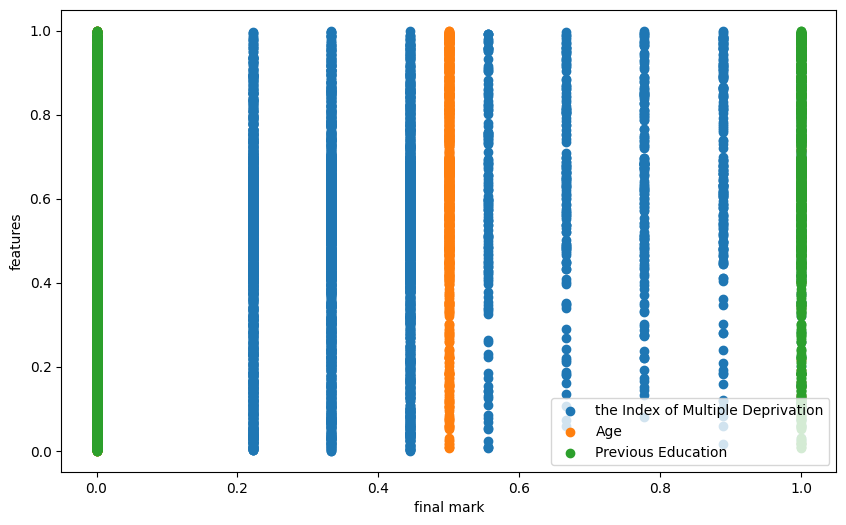

In [5]:
# create a scatter plot with multiple x variables

plt.figure(figsize=(10,6))
plt.scatter(x='imd_band',y='adjusted_mark', data=data,cmap="copper", label='the Index of Multiple Deprivation')
plt.scatter(x='age_band',y= 'adjusted_mark', data=data,cmap="copper", label='Age')
plt.scatter(x='edu',y= 'adjusted_mark', data=data,cmap="copper", label='Previous Education')
plt.legend()
plt.xlabel('final mark')
plt.ylabel('features')
plt.show()

In [6]:
# extract the four features, 'imd_band', 'age_band', 'edu','adjusted_mark'
predict_data = data[['imd_band', 'age_band', 'edu','adjusted_mark']]
# predict_data = data[['imd_band']]
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(predict_data)
y_predicted

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 2, ..., 2, 2, 1], dtype=int32)

In [7]:
predict_data

,imd_band,age_band,edu,adjusted_mark
0,1.000000,1.0,1.0,0.640630
1,0.222222,0.0,0.0,0.560220
2,0.333333,0.0,0.0,0.526113
3,0.222222,0.0,0.0,0.520492
4,0.333333,0.0,0.0,0.584070
...,...,...,...,...
7568,0.666667,0.5,1.0,0.538593
7569,0.444444,0.0,0.0,0.405148
7570,0.222222,0.0,0.0,0.826695
7573,0.222222,0.0,0.0,0.528431


In [7]:
data['cluster'] = y_predicted
data.head()

,Unnamed: 0,code_module,code_presentation,id_student,total_clicks,dataplus,dualpane,externalquiz,folder,forumng,...,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,edu,Group,cluster
0,0,AAA,2013J,11391,935,0,0,0,0,194,...,East Anglian Region,1.000000,1.0,0,240,N,Pass,1.0,1,1
1,1,AAA,2013J,58873,1733,9,0,0,0,229,...,East Anglian Region,0.222222,0.0,0,60,N,Pass,0.0,2,2
2,2,AAA,2013J,77367,681,0,0,0,0,78,...,East Midlands Region,0.333333,0.0,0,60,N,Pass,0.0,2,2
3,3,AAA,2013J,100893,745,5,0,0,0,255,...,Yorkshire Region,0.222222,0.0,0,60,N,Pass,0.0,2,2
4,4,AAA,2013J,102806,1945,4,0,0,0,414,...,North Western Region,0.333333,0.0,0,60,N,Pass,0.0,2,2


In [9]:
km.cluster_centers_

array([[ 2.74859191e-01, -3.60822483e-16, -5.82867088e-16,
         6.35033180e-01],
       [ 8.08013766e-01,  5.49225664e-01,  1.00000000e+00,
         6.40087138e-01],
       [ 2.10290093e-01, -8.32667268e-17, -4.99600361e-16,
         2.38159429e-01]])

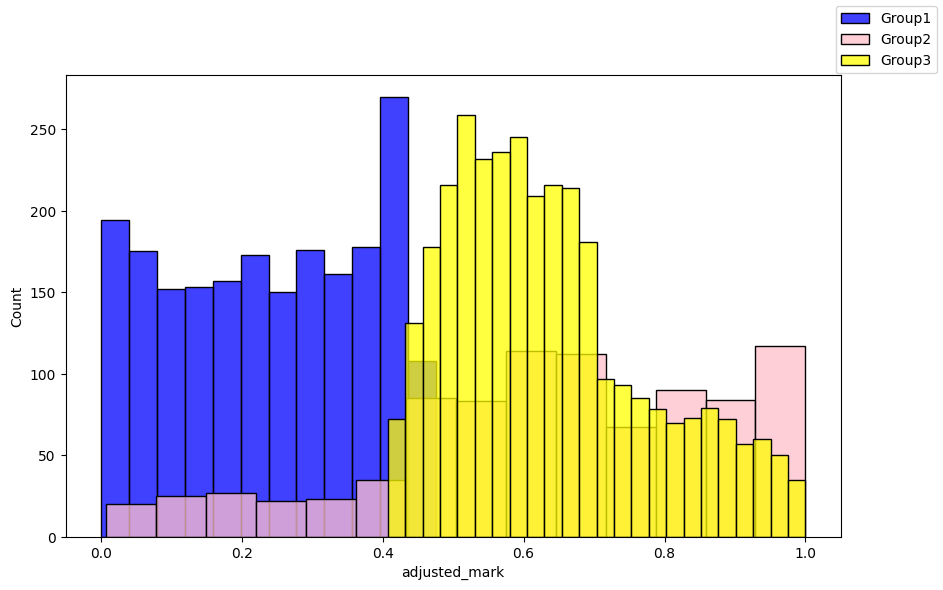

In [8]:
group1 = data[data.cluster==0]
group2 = data[data.cluster==1]
group3 = data[data.cluster==2]
fig = plt.figure(figsize=(10,6))
sns.histplot(group1.adjusted_mark, color='blue')
sns.histplot(group2.adjusted_mark, color='pink')
sns.histplot(group3.adjusted_mark, color='yellow')

fig.legend(labels=['Group1','Group2','Group3'])
plt.show()

In [9]:
# Create a figure
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Add first subplot to figure
ax = fig.add_subplot(3, 2, 1)
ax1 = sns.regplot(x="resource", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax1 = sns.regplot(x="resource", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax1 = sns.regplot(x="resource", y="adjusted_mark" , data=group3, label= "GRoup 3",ci=95, ax=ax, color='orange')
ax1.set_xlim(1,600)
ax1.set_ylim(1,110)

# Add second subplot to figure
ax = fig.add_subplot(3, 2, 2)
ax2 = sns.regplot(x="dataplus", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax2 = sns.regplot(x="dataplus", y="adjusted_mark" , data=group2, label= "Group 2",ci=95, ax=ax, color='pink')
ax2 = sns.regplot(x="dataplus", y="adjusted_mark" , data=group3, label= "Group 3",ci=95, ax=ax, color='orange')
ax2.set_xlim(1,100)
ax2.set_ylim(1,110)

# Add third subplot to figure
ax = fig.add_subplot(3, 2, 3)
ax3 = sns.regplot(x="questionnaire", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax3 = sns.regplot(x="questionnaire", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax3 = sns.regplot(x="questionnaire", y="adjusted_mark" , data=group3, label= "GRoup 3",ci=95, ax=ax, color='orange')
ax3.set_xlim(1,60)
ax3.set_ylim(1,110)


# Add fourth subplot to figure
ax = fig.add_subplot(3, 2, 4)
ax4 = sns.regplot(x="oucontent", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax4 = sns.regplot(x="oucontent", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax4 = sns.regplot(x="oucontent", y="adjusted_mark" , data=group3, label= "GRoup 3",ci=95, ax=ax, color='orange')
ax4.set_xlim(1,8000)
ax4.set_ylim(1,110)

# Add fiveth subplot to figure
ax = fig.add_subplot(3, 2, 5)
ax5 = sns.regplot(x="ouwiki", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax5 = sns.regplot(x="ouwiki", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax5 = sns.regplot(x="ouwiki", y="adjusted_mark" , data=group3, label= "GRoup 2",ci=95, ax=ax, color='orange')
ax5.set_xlim(1,1000)
ax5.set_ylim(1,110)

# Add sixth subplot to figure
ax = fig.add_subplot(3, 2, 6)
ax6 = sns.regplot(x="total_clicks", y="adjusted_mark" , data=group1, label="Group 1",ci=95, ax=ax, color='blue')
ax6 = sns.regplot(x="total_clicks", y="adjusted_mark" , data=group2, label= "GRoup 2",ci=95, ax=ax, color='pink')
ax6 = sns.regplot(x="total_clicks", y="adjusted_mark" , data=group3, label= "GRoup 3",ci=95, ax=ax, color='orange')
ax6.set_xlim(0,12000)
ax6.set_ylim(1,110)


plt.show()